### Introduction:
Stack Overflow has conducted developers survey since 2011. With nearly 65,000 responses fielded from over 180 countries, their 2020 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. 2020 survey added a new set of questions to understand the trends of the development community.

Results of 2020 survey are available [here](https://insights.stackoverflow.com/survey/)

### 1. Business Understanding

From some of the questions that were asked in the 2020 survey, I would like to get a better understaning of the following questions:

1. Which programming, scripting, and markup languages have the developers used in thir work over the past year?
2. Does the company onboarding process have any link to job satisfaction of the developers?
3. Based on the age of the developer, do they have any preference to the collaboration tool they use?

In [1]:
#import numpy, pandas, matplotlib, seaborn libraries needed for the analysis
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline


#### Gather
Gathering of the data from the csv file in a dataframe. Listing out the data to get initial idea on the structure and composition of data.

In [2]:
#create dataframe from StackOverflow 2020 survey result csv file
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### 2. Understanding the data

Following CRISP-DM process -

Check the following things about the dataset when getting started: <br>
    -- Look at the number of rows and columns in the dataset. <br>
    -- Check if there are missing values in any of the rows or columns. <br>
    -- Check if any columns are of different data types than you would expect (ex: numbers showing as strings) <br>
    -- Build exploratory plots like bar charts, histograms, and scatterplots to better understand the data. <br> <br>



In [3]:
#get details in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [4]:
#check number of rows and columns in the dataset
print(df.shape)

(64461, 61)


In [5]:
#check the columns tht contain zero null values
df.columns[np.sum(df.isnull()) == 0]

Index(['Respondent'], dtype='object')

<B>Respondent</B> is the only column that does not contain any null value.

In [6]:
#Provide column names with missing Values (NaN values) and missing % of Total Count

def missing_values(df):
    
        '''
        INPUT
        df - pandas dataframe that you want to evaluate for columns with count missing values and their percentages  
        OUTPUT:
        mz_table - a dataframe with column names, count of missing values and the percentage of those missing values
        '''
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = { 0 : 'Missing Values', 1 : 'Missing % of Total Count'})
        return mz_table

missing_values(df)

,Missing Values,Missing % of Total Count
Respondent,0,0.000000
MainBranch,299,0.463846
Hobbyist,45,0.069810
Age,19015,29.498456
Age1stCode,6561,10.178247
...,...,...
WebframeWorkedWith,22182,34.411505
WelcomeChange,11778,18.271513
WorkWeekHrs,23310,36.161400
YearsCode,6777,10.513334


The function above helps us understand number of missing values in each column as well as % of missing values.

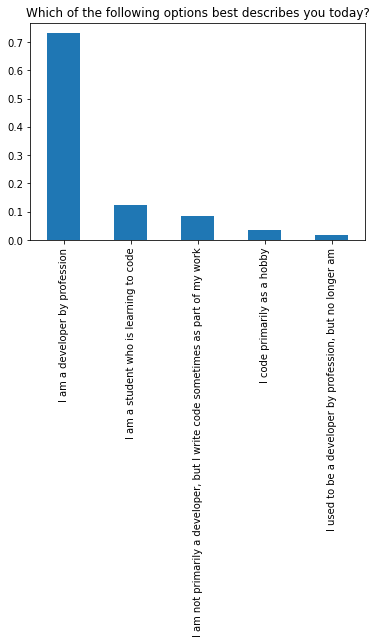

In [7]:
#Provide a pandas series of the counts for each Professional status
status_vals = df.MainBranch.value_counts() 

# The below should be a bar chart of the proportion of individuals in each category
(status_vals/df.shape[0]).plot(kind="bar")
plt.title("Which of the following options best describes you today?");

The bar chart above provides information that little over 70% of the survey respondent are developers. Spread of the respondednts for other categories is relatively small.

### 3. Modelig the Data

In [8]:
#unique count of education level
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

The output above lists out different education level with the count for each one of them. <BR>

#### Visualize
Visualization of the data to get a understanding of the spread. In the excercise below I am looking at the bar plot which displays the education level of the respondents.

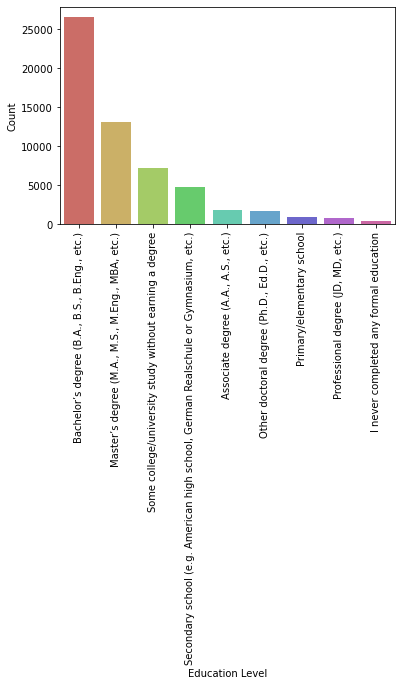

In [9]:
#display education level of the respondents in a bar plot

edlevel_index = df.EdLevel.value_counts().index
edlevel_count = df.EdLevel.value_counts()
sns.despine(left = True, bottom = True)
ax = sns.barplot(x = edlevel_index, y = edlevel_count, palette = 'hls', data = df)

ax.set(xlabel='Education Level', ylabel='Count')

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()


Bar chart above provides a visual representation of the details on the education level of the respondents of the survey.

### Question 1 - Which programming, scripting, and markup languages have the developers used in thir work over the past year?

The responses provided by the developers is in multi select value format and interested in knowing which programming or scipting languages are the most used by these develoers. To get the deisred output I extracted individual values of the selections for each of the developers and structureed them as individual rows in the dataset. The next step was to get the count of each of the language and then present them in a bar chart. The bar chart below represents the percentage of each of the languages.  


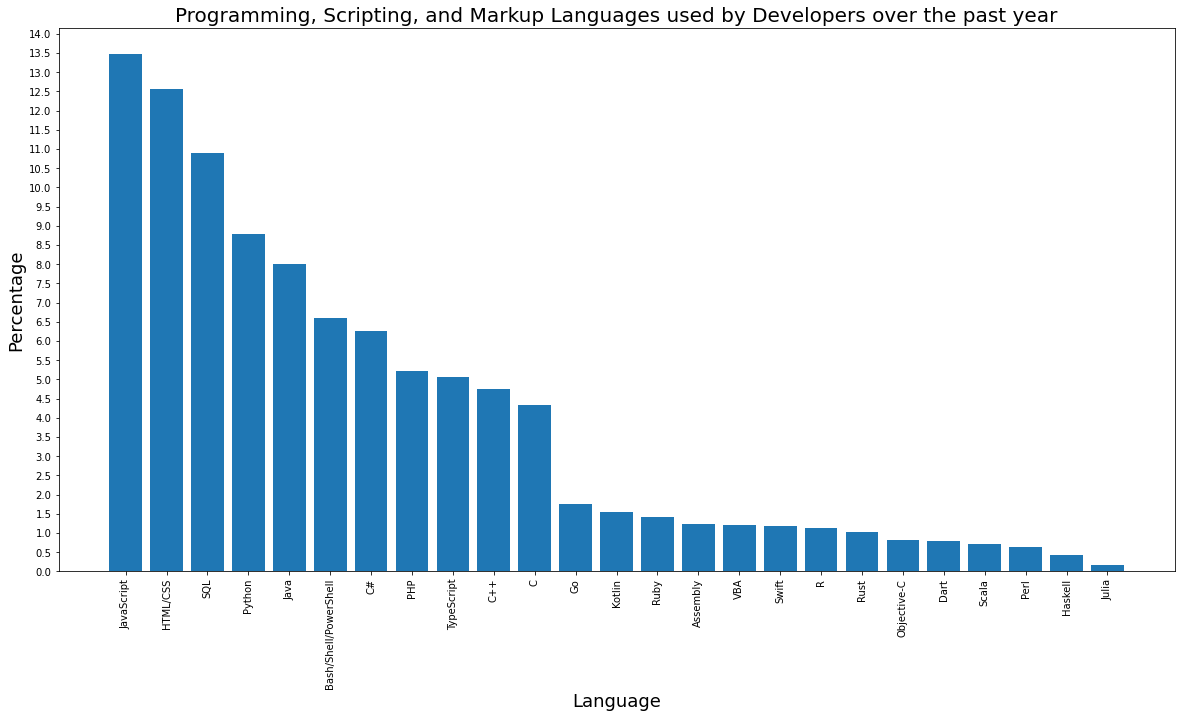

In [10]:
#make a dataframe with coulums Respondent and LanguageWorkedWith. 
#split individual language responses in to seperate rows
# Withe information on mising values from the query above, we have around 10% of participants who have not provided any response
# to the languages they have worked with. Considering that we have 90% of responses with good data, we can get a very good idea 
# as well as information on the most popular programming and scripting languages used by the devlopers. Considering this we will
# drop the rows which do not contain any value
df_lang_temp = df[['Respondent','LanguageWorkedWith']]
df_lang_temp = df_lang_temp.dropna()
df_lang = pd.DataFrame(df_lang_temp.LanguageWorkedWith.str.split(';').tolist(), index=df_lang_temp.Respondent).stack()
df_lang = df_lang.reset_index([0, 'Respondent'])
df_lang.columns = ['Respondent','LanguageWorkedWith']


df_lang = df_lang.groupby(['LanguageWorkedWith']).size().reset_index(name='Count')

df_lang.sort_values(by=['Count'], inplace=True, ascending=False)

sum = df_lang['Count'].sum()

df_lang['LPercentage'] = (df_lang.Count/sum)*100

x = df_lang.LanguageWorkedWith 
y = df_lang.LPercentage

#make a bar chart to display the percentage of various programming languages used by the developers
plt.figure(figsize=(20,10))
plt.xlabel('Language', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Programming, Scripting, and Markup Languages used by Developers over the past year', fontsize=20)

plt.bar(x, y)
plt.xticks(rotation = 'vertical')
plt.yticks(np.arange(0, max(y) + 1, 0.5))
plt.show()

### Question 2 - Does the company onboarding process have any link to job satisfaction of the developers?

In 2020 survey there was a new field that was added to capture the responses on onboarding process. I was interested in looking any correlation that the exiatance of onboarding process may have with regard to the job satisfaction level of the developer.

To understand the correlation I created clustered bar chart of job satisfaction grouped by the response to onboarding process. In addition top looking at the number of responses I calculated the % of responded. 

Also to get a better idea I collaped the two onboarding responses - "No" and "Onboarding? What Onboarding?" into one set to then compare with the "Yes" responses. I created a seperate bar chart for this analysis. 

In the evaluation of the data below I decided to drop the rows vs imputing values from the other roes. One of the cons of imputing method is that we could dilute the power of the feature to predict well by reducing variability in those feature. By imputing the values I am looking at the possibility of diluting the importance of the data. The objective here is to see if there is any kind of correlation that exists between the onboarding process and the overall job satisfaction. Given this background going with deletion of missing values rows seemed to make more sense.


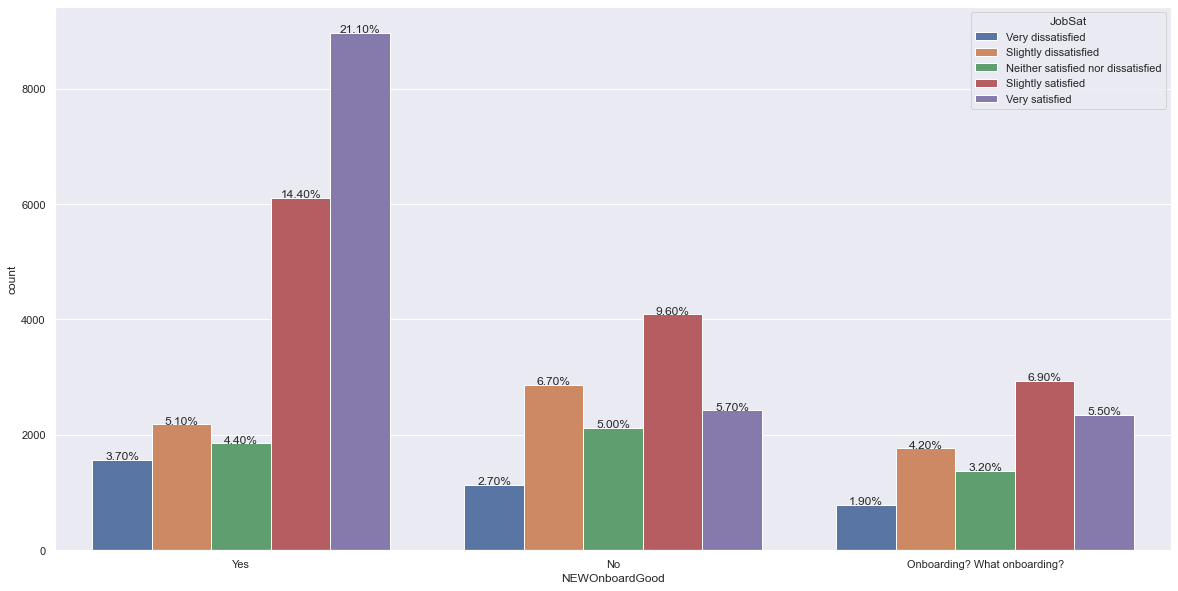

In [11]:
# Make a new dataframe that drops all rows with null values in the OrgSize and JobSat columns

#In the evaluation of the data below I decided to drop the rows vs imputing values from the other rows. 
#One of the cons of imputing method is that we could dilute the power of the feature to predict well by reducing 
#variability in those feature. By imputing the values I am looking at the possibility of diluting the importance of 
#the data. The objective here is to see if there is any kind of correlation that exists between the onboarding process 
#and the overall job satisfaction. Given this background going with deletion of missing values rows seemed to make more sense.

df2 = df.dropna(subset=['NEWOnboardGood', 'JobSat'], axis=0)

total = float(len(df2)) 
%matplotlib inline
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x='NEWOnboardGood', hue='JobSat', data=df2, hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'])

for p in ax.patches:
    height = p.get_height()
    foobar = float('{:1.3f}'.format(height/total)) * 100
    foobar = str(('%.2f' %foobar)) + '%'
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            foobar, 
            ha="center")

plt.show();


##### Grouping  "No" and "Onboarding? What Onboarding?" responses.

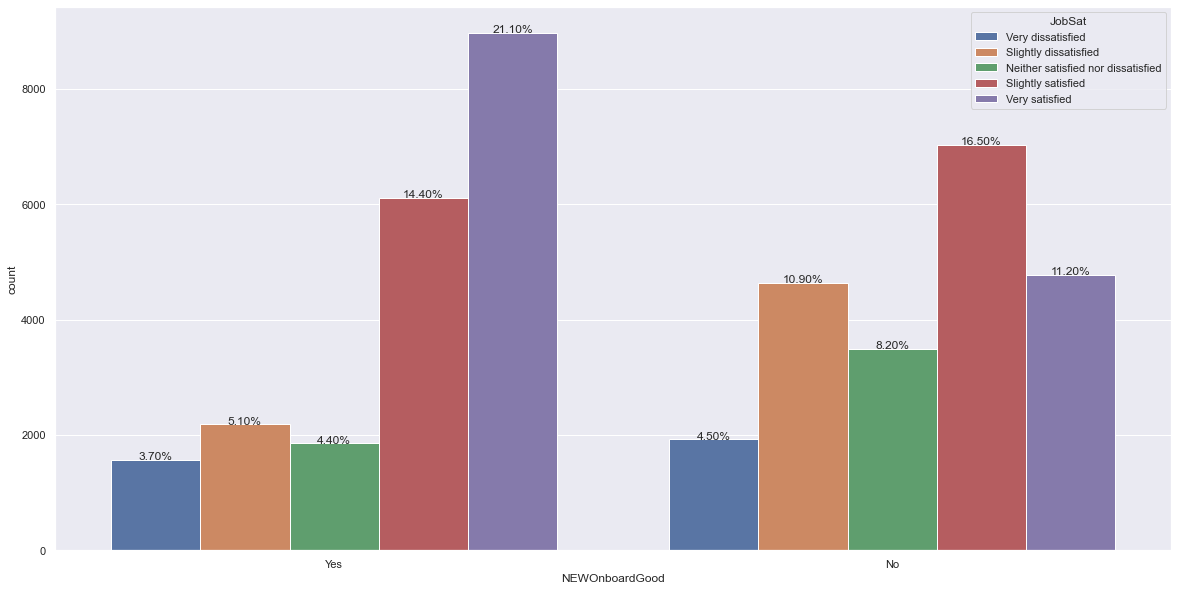

In [12]:
# Make a new dataframe with OrgSize and JobSat columns and drop all rows with null values in the dataframe 
df2 = df.dropna(subset=['NEWOnboardGood', 'JobSat'], axis=0)
df2 = df2.copy()
df2['temp_NEWOnboardGood'] = df2['NEWOnboardGood'].copy()
#grouped "No" and "Onboarding? What Onboarding?" responses
df2.loc[df2['temp_NEWOnboardGood'] == 'Onboarding? What onboarding?', 'NEWOnboardGood'] = 'No'

total = float(len(df2)) 
%matplotlib inline
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x='NEWOnboardGood', hue='JobSat', data=df2, hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'])


for p in ax.patches:
    height = p.get_height()
    foobar = float('{:1.3f}'.format(height/total)) * 100
    foobar = str(('%.2f' %foobar)) + '%'
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            foobar, 
            ha="center")

plt.show()

Looking at the two charts above it is evident that the job satisfaction level of developers is higher for the companies where onboarding process existes compared to the ones that do not have one. For the "Very satisfied" category the percentage is almost double for the one with onboarding compared to the other category. 

### Question 3 - Based on the age of the developer, do they have any preference to the collaboration tool they use?

In 2020 survey a new question was added to look at the use of collaboration tools. I wanted to look at the populatity of different types of collaboration tools based on the age of the developer.

To get an ide on the overall age distribution, I created a HistPlot to present the distribution.

The second chart displays the use of each of the collaboration tools based on the age of developer. To keep the chart clean I looked at the foirst chart and decided to use the data for age group between 15 and 65 years along with the additional condition of presenting chart of data only if the count for the collaboration tool is greater than 180.


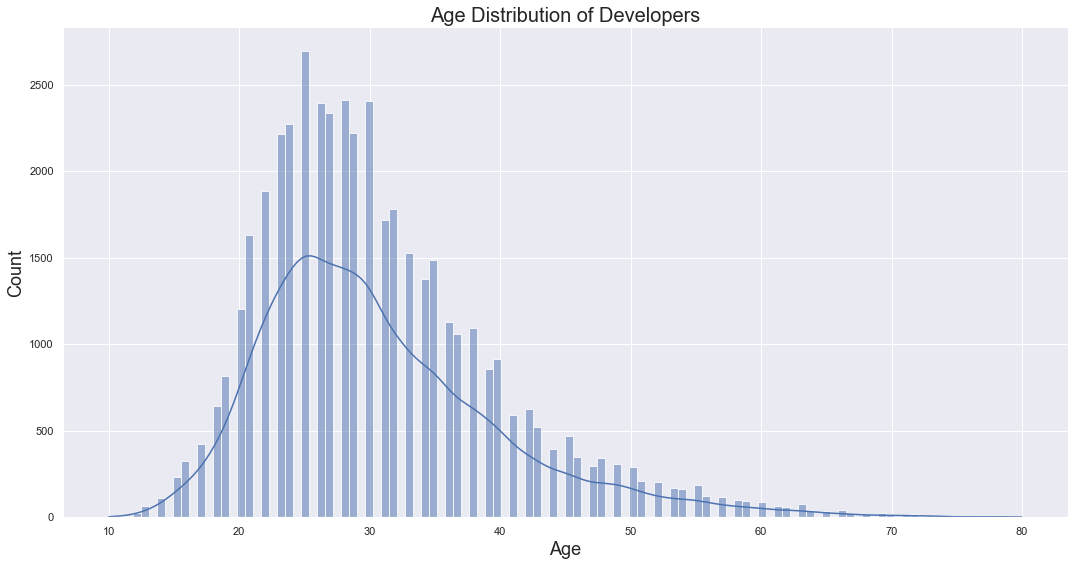

In [13]:
# Make a new dataframe with Age column and drop all null values. 
#Filter the values between age 10 and 80
df_age = df.dropna(subset=['Age'], axis=0)
df_age = df_age[df_age.Age >= 10] 
df_age = df_age[df_age.Age <= 80] 


#plot a chart with count distubution for various ages
f, ax = plt.subplots(figsize=(18, 9))
ax.set_title('Age Distribution of Developers', fontsize=20)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
sns.despine(f)
sns.histplot(data=df_age, x="Age", kde=True);

The cart above provides us with an insight on the distribution of the ages of the developers. From the chart it is evident that mejority of the developers are in the age range of 15 to 65 years. To get a better picture of the tools used we will use this age range and look for count greater than 180 for our analysis.

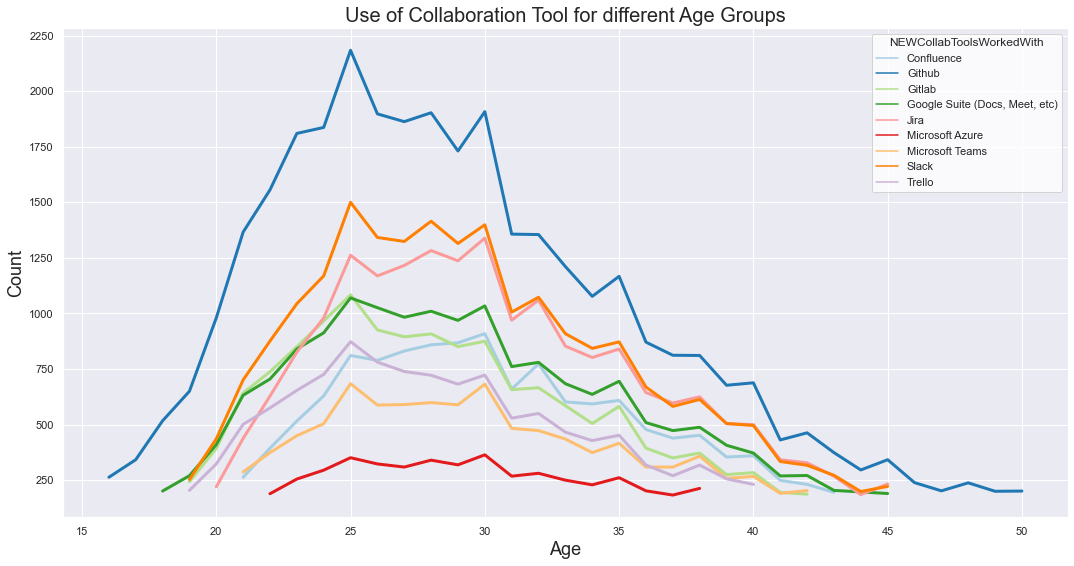

In [14]:
# Make a new dataframe with Age and NEWCollabToolsWorkedWith columns  
#remove age entries that are outside of 15-65 age range and also remove entries where count is less than 180
df3 = df.dropna(subset=['Age','NEWCollabToolsWorkedWith'], axis=0)
df4 = df3[['Age', 'NEWCollabToolsWorkedWith']].copy()
df4 = DataFrame(df4.NEWCollabToolsWorkedWith.str.split(';').tolist(), index=df4.Age).stack() 
df4 = df4.reset_index()[[0, 'Age']] 
df4.columns = ['NEWCollabToolsWorkedWith','Age'] 
df4 = df4.groupby(['NEWCollabToolsWorkedWith','Age']).size().reset_index(name='counts')
df4 = df4[df4.counts >= 180] 
df4 = df4[df4.Age >= 15] 
df4 = df4[df4.Age <= 65] 

#create a chart that displays distribution of collaboration tool use based on various age groups
dims = (18, 9)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Use of Collaboration Tool for different Age Groups', fontsize=20)
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
sns.set_theme(style="ticks")
palette = sns.color_palette("Paired", 9)
sns.lineplot(ax=ax, data=df4, x="Age", y="counts", hue="NEWCollabToolsWorkedWith", linewidth = 3,legend="auto", palette=palette);


From the chart above it is evident that Github is the most popular collaboration tool across all age groups.  Slack is more popular than Jira for younger age groups but has same popularity for age 30 and older. 

Also the spread of the use of the collaboration tools is mostly consistant with the spread of age distribution chart above. 